# Python Version

Handles complex values naturally.


## Loading Modules

In [1]:
! pip install numpy matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.1 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 31.4 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 64.7 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   -------------------------------------- - 6.8/7.0 MB 32.3 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 30.8 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- --

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Generate complex sinusoidal data with complex noise

In [3]:
# Synthetic dataset
np.random.seed(42)
N = 500

x = np.linspace(0, 4*np.pi, N)

# True signal: sin + j cos
y_true = np.sin(x) + 1j * np.cos(x)

# Complex Gaussian noise
noise = 0.2 * (np.random.randn(N) + 1j*np.random.randn(N))
y = y_true + noise


## Complex Linear Regression (Least Squares)

### Feature matrix with sin(x) and cos(x)

In [6]:
X = np.vstack([
    np.sin(x),
    np.cos(x)
]).T


### Complex linear regression

In [7]:
beta = np.linalg.lstsq(X, y, rcond=None)[0]
A, B = beta

print("Estimated A:", A)
print("Estimated B:", B)

y_pred = X @ beta


Estimated A: (0.9932664291791943+0.00275186212385499j)
Estimated B: (-0.012524295455988656+0.9714668363734332j)


## Plot real + imaginary fits

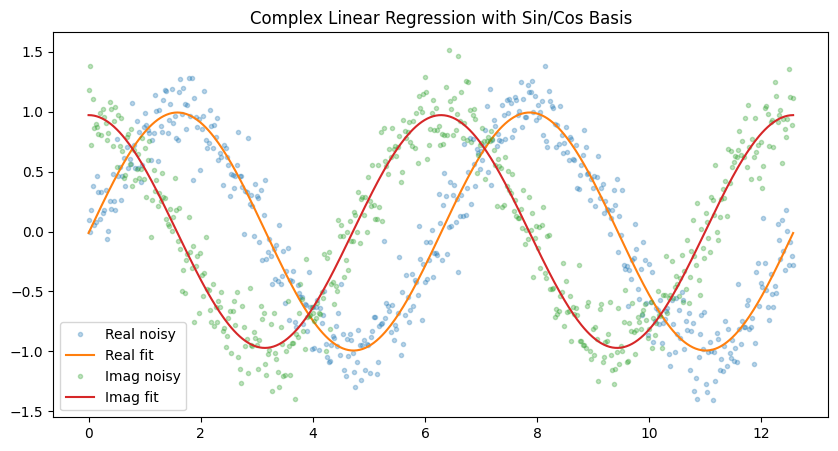

In [8]:
plt.figure(figsize=(10,5))
plt.plot(x, y.real, '.', alpha=0.3, label="Real noisy")
plt.plot(x, y_pred.real, label="Real fit")

plt.plot(x, y.imag, '.', alpha=0.3, label="Imag noisy")
plt.plot(x, y_pred.imag, label="Imag fit")

plt.legend()
plt.title("Complex Linear Regression with Sin/Cos Basis")
plt.show()
